# MAR 653 Marketing Analytics
## 


Ryan Timbrook (RTIMBROO)  
DATE:
Topic: 

## 1. Objective
_____________________________________________________________________________________________



______________________________________________________________________________________________
### Coding Environment Setup
Import packages

In [1]:
# import packages for analysis and modeling
import pandas as pd #data frame operations
import numpy as np #arrays and math functions

## -- VISUALIZATION Packages
import matplotlib.pyplot as plt #2D plotting
%matplotlib inline

plt.style.use('fivethirtyeight')
import seaborn as sns #
## -- 
import os
import io
import re
from itertools import product
from datetime import date
from datetime import time
from datetime import datetime
import warnings
from timeit import default_timer               # performance processing time
import logging                                 # logging framework
# get loggers
warnings.filterwarnings('ignore')

## Clustering
#from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, make_scorer, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from scipy import stats
import statsmodels.formula.api as smf  # R-like model specification
import statsmodels.api as sm  # statistical models (including regression)

In [2]:
# custome python packages
import rtimbroo_utils as rt             # custome python helper functions
import auq_42_utils as au

All the files are downloaded


In [3]:
# set global properties
notebook_file_name = 'airbnb_seattle_regression'
report_file_name = 'airbnb_seattle_regression'
app_name = 'airbnb_seattle_regression'
log_level = 10 # 10-DEBUG, 20-INFO, 30-WARNING, 40-ERROR, 50-CRITICAL

# setup working directory structure
# set global properties
dataDir = './data'
outputDir = './output'
configDir = './config'
logOutDir = './logs'
imageDir = './images'
modelDir = './models'
corpusDir = './corpus'

In [4]:
# create base output directories if they don't exist
if not os.path.exists(outputDir): os.mkdir(outputDir)
if not os.path.exists(logOutDir): os.mkdir(logOutDir)
if not os.path.exists(imageDir): os.mkdir(imageDir)
if not os.path.exists(modelDir): os.mkdir(modelDir)
if not os.path.exists(corpusDir): os.mkdir(corpusDir)
    
cleanPath = f'{dataDir}/clean'
if not os.path.exists(cleanPath): os.makedirs(cleanPath)

In [5]:
# get current date
now = datetime.utcnow().isoformat()
now_date = re.findall('^[0-9]{4}-[0-9]{2}-[0-9]{2}',now)
now_date

['2020-03-16']

In [6]:
#a logger for troubleshooting / data exploration
logger = rt.getFileLogger(logOutDir+'/',app_name+'_'+now_date[0],level=log_level)

## 2. OBTAIN the data   
________________________________________________________________________________________________
Import external datasets for evaluation

##### Airbnb Seattle
* Cleaned Data

In [7]:
# datasets file names to load
master = pd.read_csv(f'{cleanPath}/master.csv', error_bad_lines=False, encoding="ISO-8859-1")

#calendar_listings = pd.read_csv(f'{dataDir}/seattle/calendar.csv', error_bad_lines=False, encoding="ISO-8859-1")

In [ ]:
logger.info(f'master.shape: {master.shape}')

In [ ]:
master.head()

In [ ]:
logger.debug(master.columns)

# Regression Analysis
## 3. Model Build - Random Forest Classifier
Python Package: scikit-learn v0.21.3 [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).<br>

* n_estimators: 100
* max_depth: None (default)
* min_samples_plit=2

In [8]:
modelsPerformance = {'ModelName':[], 'TestAccuracyScore':[],'PredictAccuracyScore':[] ,'FitTime':[], 'ScoreTime':[], 'PredictTime':[]}

## Regression 1: price

**feature  importance:**
* price    0.223598
* cleaning_fee    0.137062
* weekly_discount_rate    0.075858
* weekly_discount_offer    0.074313
* weekly_price    0.073819
* security_deposit    0.071463
* monthly_discount_rate    0.067102
* extra_people_fee    0.064742
* monthly_discount_offer    0.052550
* monthly_price    0.051312

In [9]:
y = master['income_performance_label']

y shape: (3120,)
X shape: (3120, 16)
X_train shape: (2496, 16)
X_test shape: (624, 16)
y_train shape: (2496,)
y_test shape: (624,)


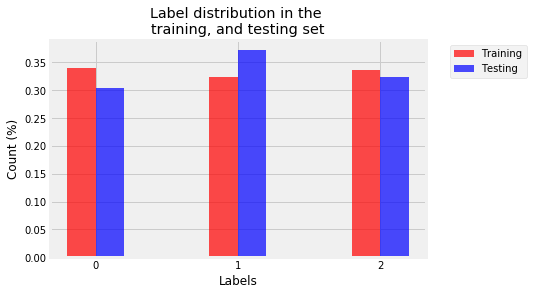

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

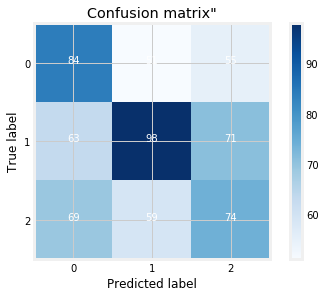

                   feature  importance
0                    price    0.223482
4             cleaning_fee    0.136947
12   weekly_discount_offer    0.076399
1             weekly_price    0.074013
14    weekly_discount_rate    0.073370
3         security_deposit    0.072605
6         extra_people_fee    0.066364
15   monthly_discount_rate    0.064004
13  monthly_discount_offer    0.053514
2            monthly_price    0.052452



              precision    recall  f1-score   support

      Class0       0.39      0.44      0.41       190
      Class1       0.47      0.42      0.45       232
      Class2       0.37      0.37      0.37       202

   micro avg       0.41      0.41      0.41       624
   macro avg       0.41      0.41      0.41       624
weighted avg       0.41      0.41      0.41       624



<Figure size 432x288 with 0 Axes>

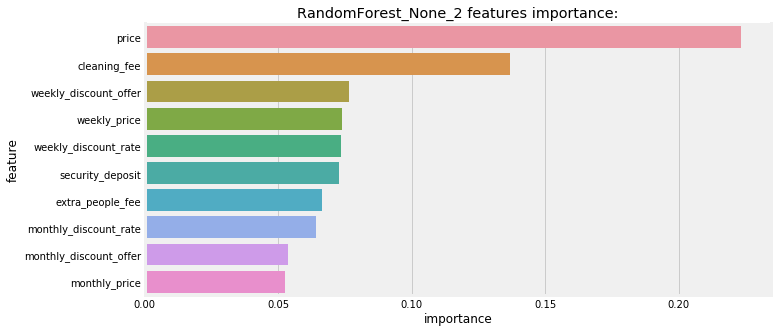

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
RandomForest Probability Predict Time: [0.02406490000021222]
624


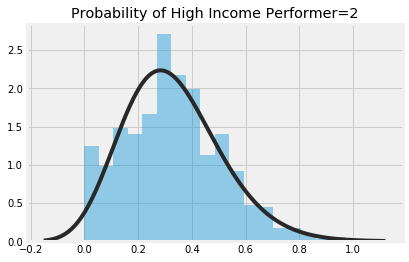

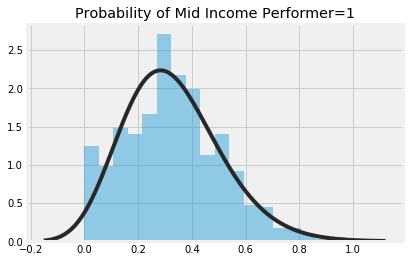

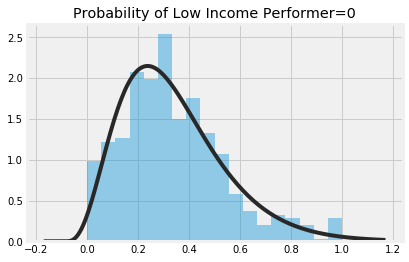

In [33]:
# drop cols for regression analysis
keep_cols = ['price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people_fee', 'has_weekly_price', 'has_monthly_price',
       'has_security_deposit', 'has_cleaning_fee', 'has_extra_people_fee',
       'weekly_discount_offer', 'monthly_discount_offer',
       'weekly_discount_rate', 'monthly_discount_rate']


X = master[keep_cols]

exec_rf(X,y)



In [50]:
best_atts = ['price','cleaning_fee','weekly_discount_rate','weekly_price','security_deposit']

## Regression 2: Review Scores + Top Features
Top Performing Features from prior test:
* price
* cleaning_fee

feature  importance
4         avg_pol_compound_score    0.876119
0      review_scores_cleanliness    0.041120
3         review_scores_location    0.029133
1          review_scores_checkin    0.024762
2    review_scores_communication    0.024093
6  avg_review_sentiment_positive    0.004602
5  avg_review_sentiment_negative    0.000171


In [ ]:
complete_list = ['number_of_reviews','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'top90', 'upto25', 'avg_pol_pos_score',
       'avg_pol_neg_score', 'avg_pol_neu_score', 'avg_pol_compound_score','avg_review_sentiment_negative',
       'avg_review_sentiment_neutral', 'avg_review_sentiment_positive',
       'review_days_range',
       'review_years_range', 'reviews_per_year_rate', 'review_frequency']

y shape: (3120,)
X shape: (3120, 7)
X_train shape: (2496, 7)
X_test shape: (624, 7)
y_train shape: (2496,)
y_test shape: (624,)


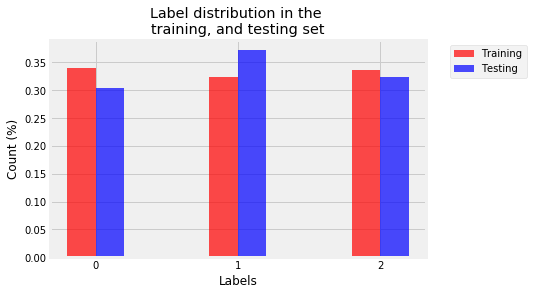

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

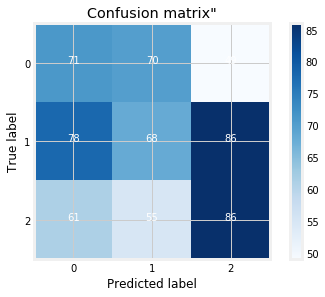

                         feature  importance
4         avg_pol_compound_score    0.876119
0      review_scores_cleanliness    0.041120
3         review_scores_location    0.029133
1          review_scores_checkin    0.024762
2    review_scores_communication    0.024093
6  avg_review_sentiment_positive    0.004602
5  avg_review_sentiment_negative    0.000171



              precision    recall  f1-score   support

      Class0       0.34      0.37      0.35       190
      Class1       0.35      0.29      0.32       232
      Class2       0.39      0.43      0.41       202

   micro avg       0.36      0.36      0.36       624
   macro avg       0.36      0.36      0.36       624
weighted avg       0.36      0.36      0.36       624



<Figure size 432x288 with 0 Axes>

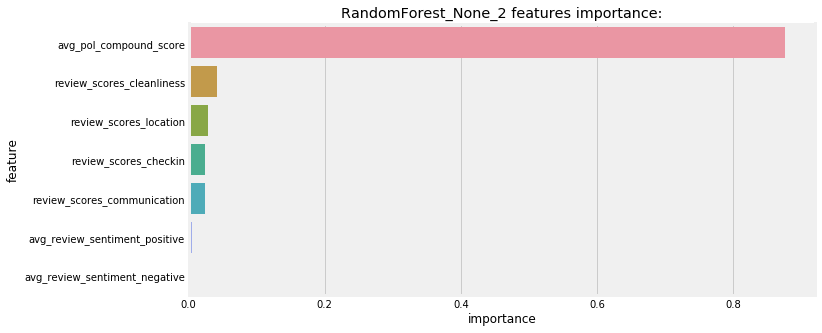

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
RandomForest Probability Predict Time: [0.024604400000043825]
624


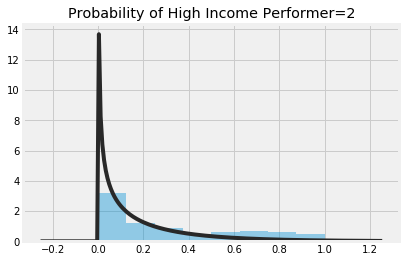

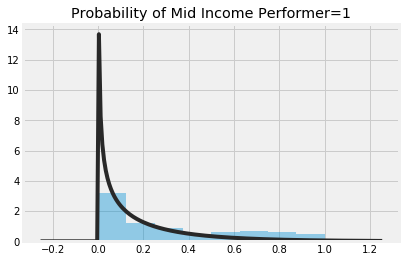

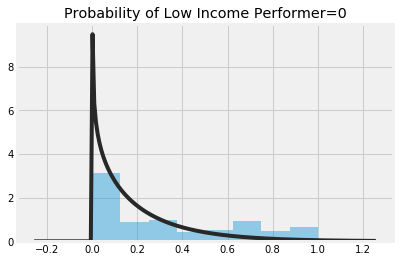

In [34]:
top_cols = ['price','cleaning_fee']
keep_cols = [
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
    'avg_pol_compound_score',
        'avg_review_sentiment_negative',
       'avg_review_sentiment_positive',
       ]



#X = master[top_cols+keep_cols]
X = master[keep_cols]
exec_rf(X,y)



In [51]:
best_atts = best_atts+['avg_pol_compound_score','review_scores_cleanliness','review_scores_location','review_scores_checkin']

# Regression 3: Policies + Top Features

feature  importance

feature  importance
0                    minimum_nights    0.828039
3        cancellation_policy_strict    0.074474
2      cancellation_policy_moderate    0.049105
1      cancellation_policy_flexible    0.048382
4     require_guest_profile_picture    0.000000
5  require_guest_phone_verification    0.000000
6                  requires_license    0.000000
7                  instant_bookable    0.000000

In [ ]:
['minimum_nights', 'maximum_nights','require_guest_profile_picture', 'require_guest_phone_verification',
       'requires_license','instant_bookable']

['cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict]

y shape: (3120,)
X shape: (3120, 8)
X_train shape: (2496, 8)
X_test shape: (624, 8)
y_train shape: (2496,)
y_test shape: (624,)


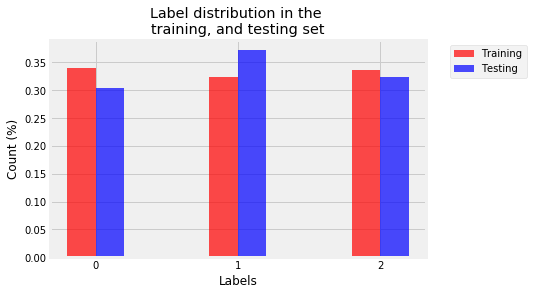

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

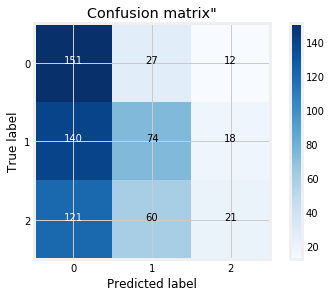

                            feature  importance
0                    minimum_nights    0.828039
3        cancellation_policy_strict    0.074474
2      cancellation_policy_moderate    0.049105
1      cancellation_policy_flexible    0.048382
4     require_guest_profile_picture    0.000000
5  require_guest_phone_verification    0.000000
6                  requires_license    0.000000
7                  instant_bookable    0.000000



              precision    recall  f1-score   support

      Class0       0.37      0.79      0.50       190
      Class1       0.46      0.32      0.38       232
      Class2       0.41      0.10      0.17       202

   micro avg       0.39      0.39      0.39       624
   macro avg       0.41      0.41      0.35       624
weighted avg       0.42      0.39      0.35       624



<Figure size 432x288 with 0 Axes>

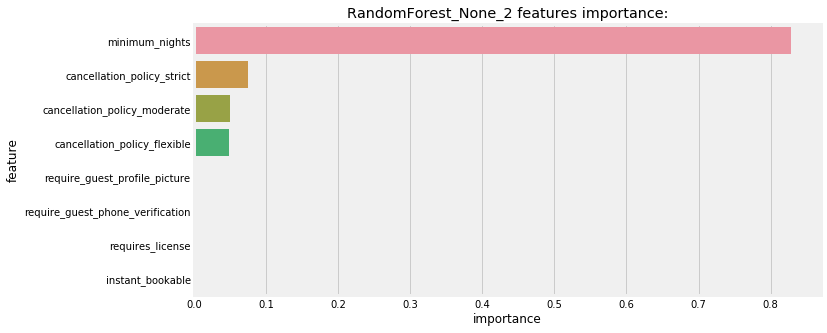

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
RandomForest Probability Predict Time: [0.01641220000010435]
624


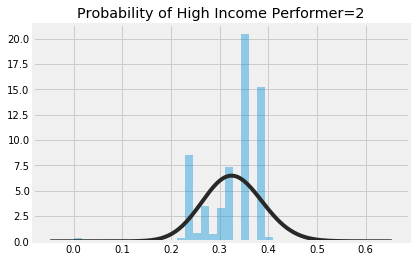

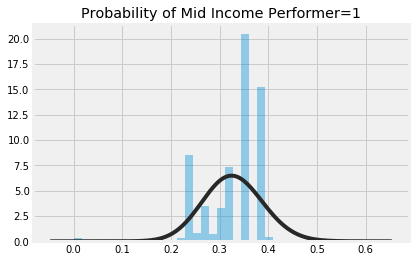

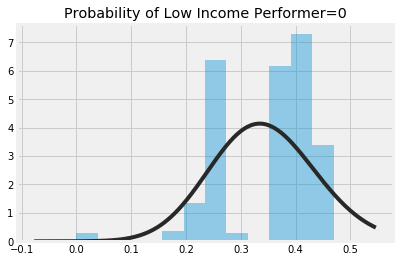

In [38]:
top_cols = ['price','cleaning_fee','avg_pol_compound_score','review_scores_cleanliness']
keep_cols = ['minimum_nights','cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict','require_guest_profile_picture', 'require_guest_phone_verification',
       'requires_license','instant_bookable'
       ]

#X = master[top_cols+keep_cols]
X = master[keep_cols]
exec_rf(X,y)

In [52]:
best_atts = best_atts+['minimum_nights','cancellation_policy_strict','cancellation_policy_moderate','cancellation_policy_flexible']

In [ ]:
master.instant_bookable.describe()

In [ ]:
# QUICK SCATTER PLOT TO LOOK AT RELATIONSHIP BETWEEN VARIABLES

sns.set(color_codes=True)

sns.regplot(x="instant_bookable", y="income_performance_label", data=master, y_jitter=0.03)
plt.show()

sns.regplot(x="minimum_nights", y="income_performance_label", data=master, y_jitter=0.03)
plt.show()

## Regression 4: Hosts

feature importance:
             host_response_rate    0.679550
6            host_response_time_hrs    0.082153
3              host_acceptance_rate    0.080296
7          host_identity_verified_t    0.073783
1      host_response_within_an_hour    0.042228
2  host_response_within_a_few_hours    0.033426
8            host_has_profile_pic_f    0.003132
4              host_has_profile_pic    0.002762
9            host_has_profile_pic_t    0.002670
5            host_identity_verified    0.000000

In [ ]:
['host_id','host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_has_profile_pic', 'host_identity_verified',
       'host_response_within_an_hour', 'host_response_within_a_few_hours',
       'host_response_time_hrs']

['host_is_superhost_f',
       'host_is_superhost_t', 'host_identity_verified_f',
       'host_identity_verified_t', 'host_has_profile_pic_f',
       'host_has_profile_pic_t']

In [40]:
master['host_response_rate'] = [x.replace('%','') for x in master['host_response_rate']]
master['host_acceptance_rate'] = [x.replace('%','') for x in master['host_acceptance_rate']]

y shape: (3120,)
X shape: (3120, 10)
X_train shape: (2496, 10)
X_test shape: (624, 10)
y_train shape: (2496,)
y_test shape: (624,)


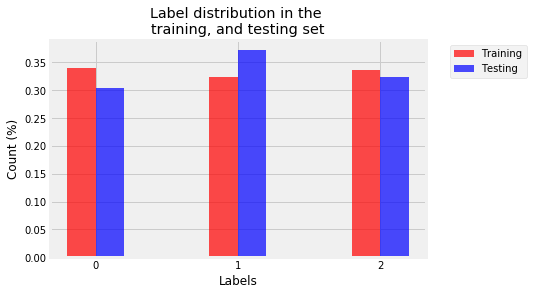

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

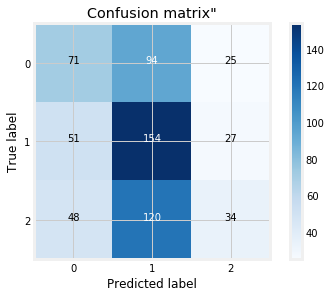

                            feature  importance
0                host_response_rate    0.679550
6            host_response_time_hrs    0.082153
3              host_acceptance_rate    0.080296
7          host_identity_verified_t    0.073783
1      host_response_within_an_hour    0.042228
2  host_response_within_a_few_hours    0.033426
8            host_has_profile_pic_f    0.003132
4              host_has_profile_pic    0.002762
9            host_has_profile_pic_t    0.002670
5            host_identity_verified    0.000000



              precision    recall  f1-score   support

      Class0       0.42      0.37      0.39       190
      Class1       0.42      0.66      0.51       232
      Class2       0.40      0.17      0.24       202

   micro avg       0.42      0.42      0.42       624
   macro avg       0.41      0.40      0.38       624
weighted avg       0.41      0.42      0.39       624



<Figure size 432x288 with 0 Axes>

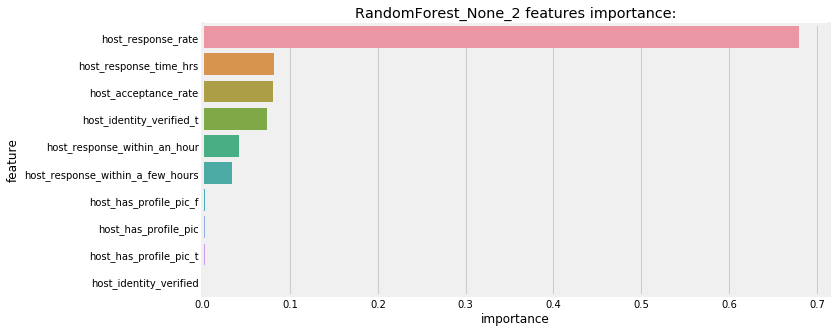

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
RandomForest Probability Predict Time: [0.03838080000014088]
624


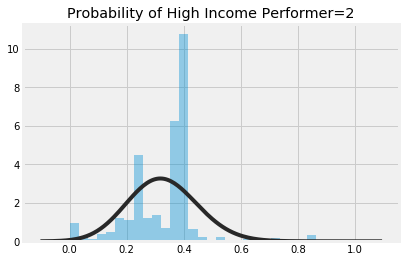

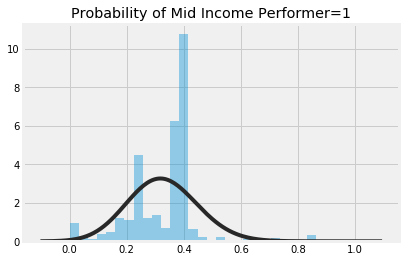

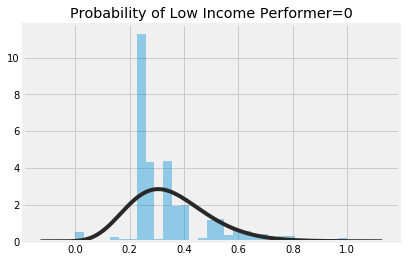

In [42]:
top_cols = ['price','cleaning_fee',
            'avg_pol_compound_score',
            'review_scores_cleanliness',
            'minimum_nights',
            'cancellation_policy_flexible',
           ]
keep_cols = [
        'host_response_rate',
       'host_response_within_an_hour', 
        'host_response_within_a_few_hours',
        'host_acceptance_rate', 
        #'host_is_superhost',
        'host_has_profile_pic', 
        'host_identity_verified',
       'host_response_time_hrs',
       #'host_is_superhost_t', 'host_identity_verified_f',
       'host_identity_verified_t', 'host_has_profile_pic_f',
       'host_has_profile_pic_t'
    
       ]

X = master[top_cols+keep_cols]
X = master[keep_cols]
exec_rf(X,y)

In [53]:
best_atts = best_atts+['host_response_rate','host_acceptance_rate',
                       'host_is_superhost_f','host_is_superhost_t','host_identity_verified_t',
                      'host_response_within_an_hour',
                      'host_response_within_a_few_hours']

## Regression 5: Property Features

feature  importance
23                       beds    0.199057
25             bathroom_share    0.158313
24              bedroom_share    0.114992
21                  bathrooms    0.111810
20               accommodates    0.101871
22                   bedrooms    0.060007
9         property_type_House    0.039505
0     property_type_Apartment    0.036890
7   property_type_Condominium    0.017948
13    property_type_Townhouse    0.017648



In [ ]:
['accommodates', 'bathrooms',
       'bedrooms', 'beds','bedroom_share', 'bathroom_share', 'private_room', 'shared_room',
       'entire_home_apt', 'real_bed', 'futon_bed', 'pull_out_sofa_bed',
       'air_bed', 'couch_bed',
       ]


['room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room']

['bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', ]

['property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse']



y shape: (3120,)
X shape: (3120, 25)
X_train shape: (2496, 25)
X_test shape: (624, 25)
y_train shape: (2496,)
y_test shape: (624,)


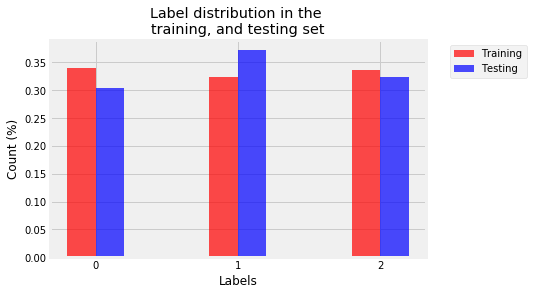

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

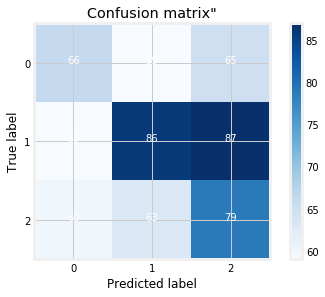

                      feature  importance
1              bathroom_share    0.387593
0               bedroom_share    0.297180
19        property_type_House    0.034702
10    property_type_Apartment    0.031193
5                    real_bed    0.025341
3                 shared_room    0.022918
2                private_room    0.022163
23    property_type_Townhouse    0.020860
17  property_type_Condominium    0.020420
6                   futon_bed    0.019254



              precision    recall  f1-score   support

      Class0       0.36      0.35      0.35       190
      Class1       0.41      0.37      0.39       232
      Class2       0.34      0.39      0.36       202

   micro avg       0.37      0.37      0.37       624
   macro avg       0.37      0.37      0.37       624
weighted avg       0.37      0.37      0.37       624



<Figure size 432x288 with 0 Axes>

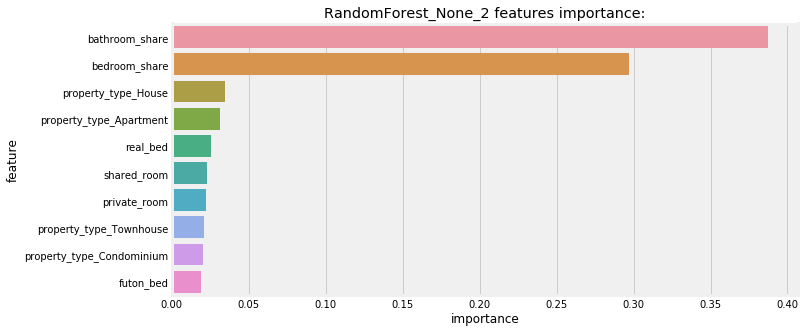

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
RandomForest Probability Predict Time: [0.020699599999716156]
624


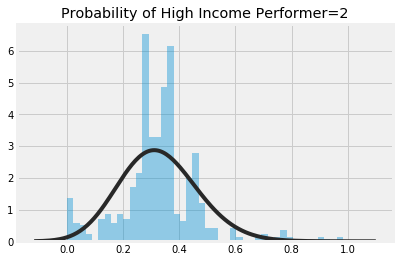

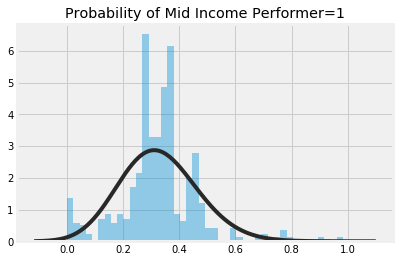

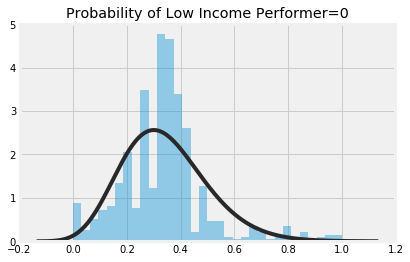

In [44]:
top_cols = [
            'price',
            'cleaning_fee',
            'avg_pol_compound_score',
            'review_scores_cleanliness',
            'minimum_nights',
            'cancellation_policy_flexible',
            'host_response_rate',
            'host_acceptance_rate',
            'host_identity_verified_t'
           ]
keep_cols = [
       'bedroom_share', 'bathroom_share', 'private_room', 'shared_room',
       'entire_home_apt', 'real_bed', 'futon_bed', 'pull_out_sofa_bed',
       'air_bed', 'couch_bed','property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse'
       ]

#X = master[top_cols+keep_cols]
X = master[keep_cols]
exec_rf(X,y)

In [54]:
best_atts = best_atts+['bathroom_share',
                       'bedroom_share',
                       'real_bed',
                       'shared_room',
                       'private_room',
                       'property_type_House',
                       'property_type_Apartment',
                       'property_type_Condominium',
                       'property_type_Townhouse']
 

## Regression 6: Dummy Variables

### Amenitites
feature  importance
17                        tv    0.095476
4        family_kid_friendly    0.095303
5   free_parking_on_premises    0.089218
11              pet_friendly    0.088012
14         security_features    0.086070
10          laundry_facility    0.061102
1            access_friendly    0.055839
9                    kitchen    0.053870
2                  breakfast    0.052264
0             24hour_checkin    0.047540

### Neighbourhoods
feature  importance
9              neighbourhood_group_cleansed_Magnolia    0.129263
6              neighbourhood_group_cleansed_Downtown    0.111628
10            neighbourhood_group_cleansed_Northgate    0.092926
12           neighbourhood_group_cleansed_Queen Anne    0.084018
1           neighbourhood_group_cleansed_Beacon Hill    0.065903
0               neighbourhood_group_cleansed_Ballard    0.058906
16         neighbourhood_group_cleansed_West Seattle    0.058077
4          neighbourhood_group_cleansed_Central Area    0.052056
14          neighbourhood_group_cleansed_Seward Park    0.049179
11  neighbourhood_group_cleansed_Other neighborhoods    0.046223

In [ ]:
['24hour_checkin', 'access_friendly', 'breakfast',
       'essentials', 'family_kid_friendly', 'free_parking_on_premises', 'gym',
       'hot_tub', 'internet', 'kitchen', 'laundry_facility', 'pet_friendly',
       'pool', 'safety_features', 'security_features', 'smoking_allowed',
       'suitable_for_events', 'tv', 'weather_control', 'host_is_superhost_f',
       'host_is_superhost_t', 'host_identity_verified_f',
       'host_identity_verified_t', 'host_has_profile_pic_f',
       'host_has_profile_pic_t', 'neighbourhood_group_cleansed_Ballard',
       'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_Rainier Valley',
       'neighbourhood_group_cleansed_Seward Park',
       'neighbourhood_group_cleansed_University District',
       'neighbourhood_group_cleansed_West Seattle',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict]

y shape: (3120,)
X shape: (3120, 19)
X_train shape: (2496, 19)
X_test shape: (624, 19)
y_train shape: (2496,)
y_test shape: (624,)


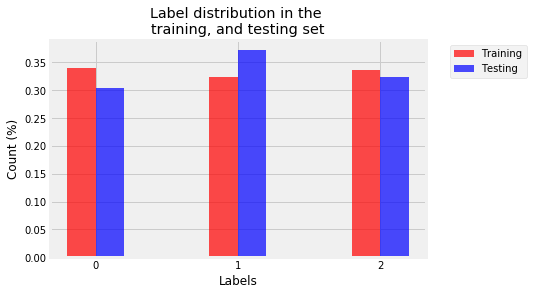

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

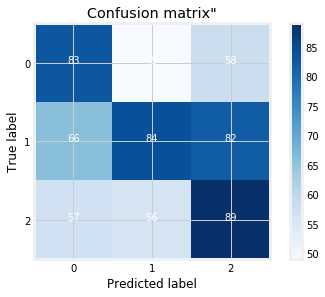

                     feature  importance
4        family_kid_friendly    0.096165
17                        tv    0.094738
11              pet_friendly    0.081982
14         security_features    0.077869
5   free_parking_on_premises    0.075608
10          laundry_facility    0.070246
1            access_friendly    0.062635
9                    kitchen    0.059618
2                  breakfast    0.055943
0             24hour_checkin    0.046222



              precision    recall  f1-score   support

      Class0       0.40      0.44      0.42       190
      Class1       0.44      0.36      0.40       232
      Class2       0.39      0.44      0.41       202

   micro avg       0.41      0.41      0.41       624
   macro avg       0.41      0.41      0.41       624
weighted avg       0.41      0.41      0.41       624



<Figure size 432x288 with 0 Axes>

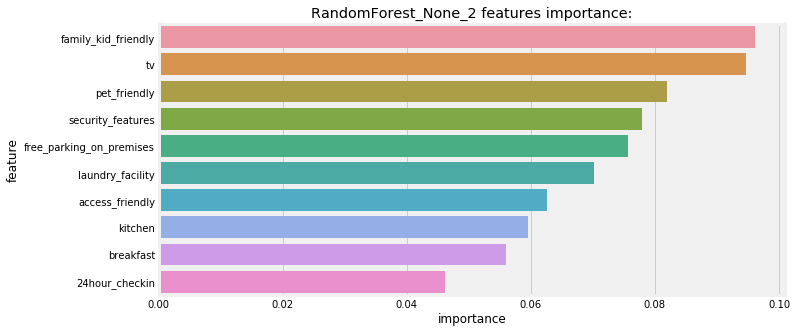

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
RandomForest Probability Predict Time: [0.02425760000005539]
624


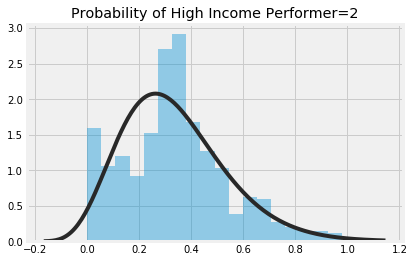

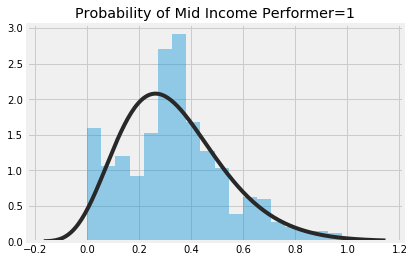

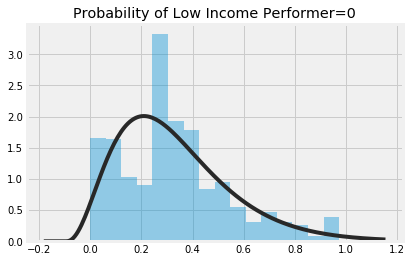

In [46]:
top_cols = ['price','cleaning_fee','avg_pol_compound_score','review_scores_cleanliness','minimum_nights']
keep_cols = ['24hour_checkin', 'access_friendly', 'breakfast',
       'essentials', 'family_kid_friendly', 'free_parking_on_premises', 'gym',
       'hot_tub', 'internet', 'kitchen', 'laundry_facility', 'pet_friendly',
       'pool', 'safety_features', 'security_features', 'smoking_allowed',
       'suitable_for_events', 'tv', 'weather_control'
       ]

#X = master[top_cols+keep_cols]
X = master[keep_cols]
exec_rf(X,y)

In [55]:
best_atts = best_atts+['tv','family_kid_friendly','free_parking_on_premises','pet_friendly','security_features']


y shape: (3120,)
X shape: (3120, 17)
X_train shape: (2496, 17)
X_test shape: (624, 17)
y_train shape: (2496,)
y_test shape: (624,)


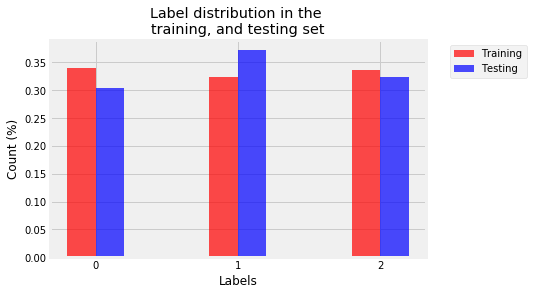

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

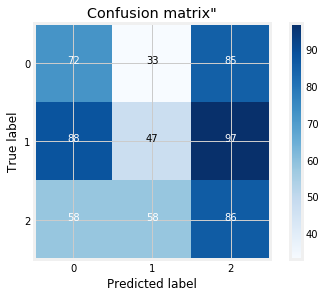

                                             feature  importance
9              neighbourhood_group_cleansed_Magnolia    0.129263
6              neighbourhood_group_cleansed_Downtown    0.111628
10            neighbourhood_group_cleansed_Northgate    0.092926
12           neighbourhood_group_cleansed_Queen Anne    0.084018
1           neighbourhood_group_cleansed_Beacon Hill    0.065903
0               neighbourhood_group_cleansed_Ballard    0.058906
16         neighbourhood_group_cleansed_West Seattle    0.058077
4          neighbourhood_group_cleansed_Central Area    0.052056
14          neighbourhood_group_cleansed_Seward Park    0.049179
11  neighbourhood_group_cleansed_Other neighborhoods    0.046223



              precision    recall  f1-score   support

      Class0       0.33      0.38      0.35       190
      Class1       0.34      0.20      0.25       232
      Class2       0.32      0.43      0.37       202

   micro avg       0.33      0.33      0.33       624
   macro avg       0.33      0.34      0.32       624
weighted avg       0.33      0.33      0.32       624



<Figure size 432x288 with 0 Axes>

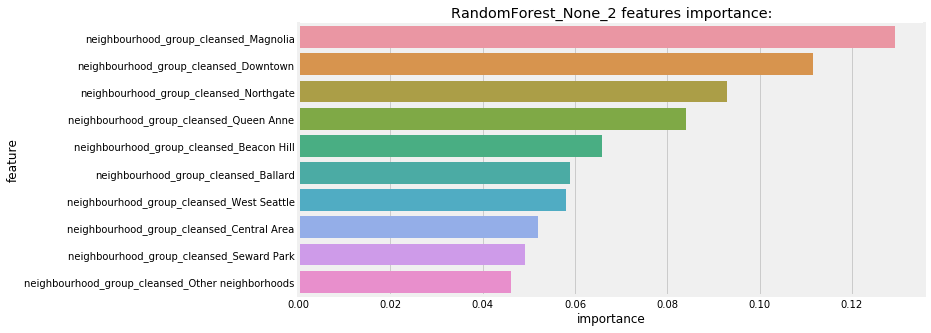

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
RandomForest Probability Predict Time: [0.015301299999919138]
624


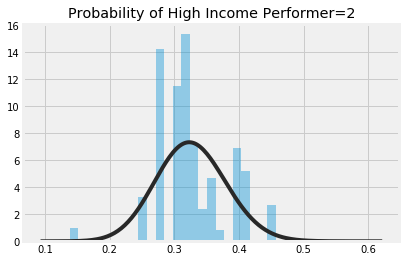

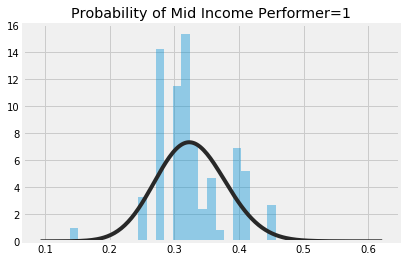

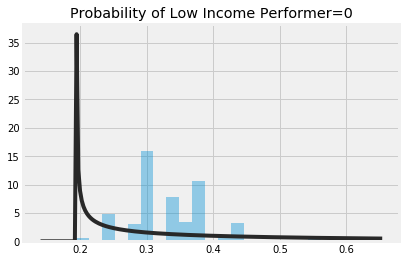

In [32]:
# neighbourhood location
        
top_cols = ['price','cleaning_fee','avg_pol_compound_score','review_scores_cleanliness','minimum_nights']
keep_cols = ['neighbourhood_group_cleansed_Ballard',
       'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_Rainier Valley',
       'neighbourhood_group_cleansed_Seward Park',
       'neighbourhood_group_cleansed_University District',
       'neighbourhood_group_cleansed_West Seattle',
       ]

#X = master[top_cols+keep_cols]
X = master[keep_cols]
exec_rf(X,y)

In [56]:
best_atts = best_atts+['neighbourhood_group_cleansed_Magnolia',
                       'neighbourhood_group_cleansed_Downtown',
                       'neighbourhood_group_cleansed_Northgate',
                      'neighbourhood_group_cleansed_Queen Anne',
                      'neighbourhood_group_cleansed_Beacon Hill',
                      'neighbourhood_group_cleansed_Ballard']


In [58]:
keep_cols = ['price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people_fee', 'has_weekly_price', 'has_monthly_price',
       'has_security_deposit', 'has_cleaning_fee', 'has_extra_people_fee',
       'weekly_discount_offer', 'monthly_discount_offer',
       'weekly_discount_rate', 'monthly_discount_rate']
keep_cols = keep_cols+['neighbourhood_group_cleansed_Ballard',
       'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_Rainier Valley',
       'neighbourhood_group_cleansed_Seward Park',
       'neighbourhood_group_cleansed_University District',
       'neighbourhood_group_cleansed_West Seattle',
       ]
keep_cols = keep_cols+[
       'bedroom_share', 'bathroom_share', 'private_room', 'shared_room',
       'entire_home_apt', 'real_bed', 'futon_bed', 'pull_out_sofa_bed',
       'air_bed', 'couch_bed','property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse'
       ]

keep_cols = keep_cols+['24hour_checkin', 'access_friendly', 'breakfast',
       'essentials', 'family_kid_friendly', 'free_parking_on_premises', 'gym',
       'hot_tub', 'internet', 'kitchen', 'laundry_facility', 'pet_friendly',
       'pool', 'safety_features', 'security_features', 'smoking_allowed',
       'suitable_for_events', 'tv', 'weather_control', 'host_is_superhost_f',
       'host_is_superhost_t', 'host_identity_verified_f',
       'host_identity_verified_t', 'host_has_profile_pic_f',
       'host_has_profile_pic_t', 'neighbourhood_group_cleansed_Ballard',
       'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_Rainier Valley',
       'neighbourhood_group_cleansed_Seward Park',
       'neighbourhood_group_cleansed_University District',
       'neighbourhood_group_cleansed_West Seattle',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict']

keep_cols = keep_cols+[
       'bedroom_share', 'bathroom_share', 'private_room', 'shared_room',
       'entire_home_apt', 'real_bed', 'futon_bed', 'pull_out_sofa_bed',
       'air_bed', 'couch_bed','property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse'
       ]
keep_cols = keep_cols+[
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
    'avg_pol_compound_score',
        'avg_review_sentiment_negative',
       'avg_review_sentiment_positive',
       ]

y shape: (3120,)
X shape: (3120, 159)
X_train shape: (2496, 159)
X_test shape: (624, 159)
y_train shape: (2496,)
y_test shape: (624,)


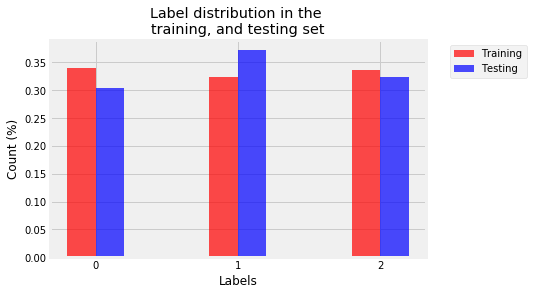

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

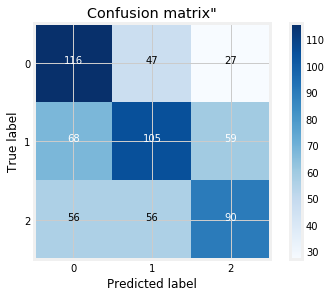

                    feature  importance
156  avg_pol_compound_score    0.071273
0                     price    0.048797
4              cleaning_fee    0.042774
14     weekly_discount_rate    0.032523
12    weekly_discount_offer    0.031786
1              weekly_price    0.028956
15    monthly_discount_rate    0.028066
3          security_deposit    0.026947
13   monthly_discount_offer    0.026073
6          extra_people_fee    0.025856



              precision    recall  f1-score   support

      Class0       0.48      0.61      0.54       190
      Class1       0.50      0.45      0.48       232
      Class2       0.51      0.45      0.48       202

   micro avg       0.50      0.50      0.50       624
   macro avg       0.50      0.50      0.50       624
weighted avg       0.50      0.50      0.50       624



<Figure size 432x288 with 0 Axes>

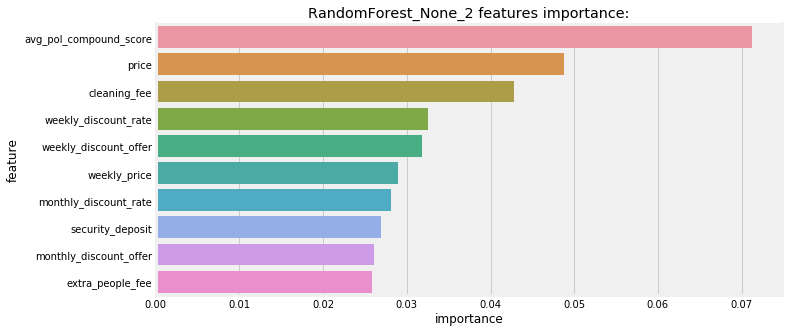

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
RandomForest Probability Predict Time: [0.025259900000492053]
624


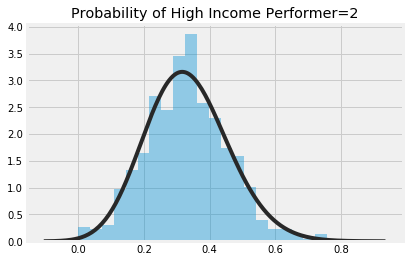

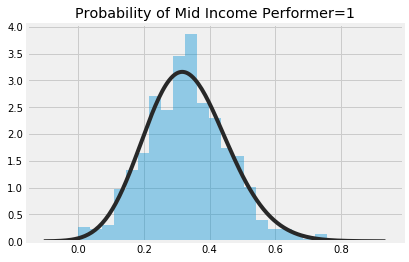

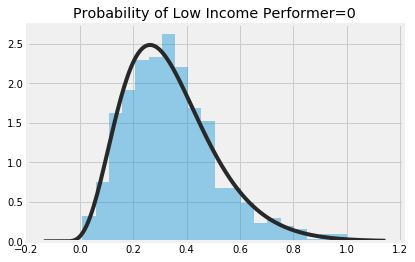

In [59]:
# 
#X = master[top_cols+keep_cols]
X = master[keep_cols]
exec_rf(X,y)

## Regression 7: 


In [48]:
#best_atts

['price',
 'cleaning_fee',
 'weekly_discount_rate',
 'weekly_price',
 'security_deposit',
 'avg_pol_compound_score',
 'review_scores_cleanliness',
 'review_scores_location',
 'review_scores_checkin',
 'minimum_nights',
 'cancellation_policy_strict',
 'cancellation_policy_moderate',
 'cancellation_policy_flexible',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost_f',
 'host_is_superhost_t',
 'host_identity_verified_t',
 'host_response_within_an_hour',
 'host_response_within_a_few_hours',
 'bathroom_share',
 'bedroom_share',
 'real_bed',
 'shared_room',
 'private_roomproperty_type_House',
 'property_type_Apartment',
 'property_type_Condominium',
 'property_type_Townhouse',
 'tv',
 'family_kid_friendly',
 'free_parking_on_premises',
 'pet_friendly',
 'security_features']

In [73]:
top_p = master[master['income_performance_label']==2]
low_p = master[master['income_performance_label']==0]

In [76]:
top_p['weekly_discount_rate'].describe()

count    1040.000000
mean        0.032293
std         0.155302
min        -1.428600
25%         0.000000
50%         0.000000
75%         0.107100
max         0.489800
Name: weekly_discount_rate, dtype: float64

In [77]:
low_p['weekly_discount_rate'].describe()

count    1040.000000
mean        0.043338
std         0.140366
min        -1.164500
25%         0.000000
50%         0.000000
75%         0.110050
max         0.590800
Name: weekly_discount_rate, dtype: float64

In [ ]:
top_p

## Regression 8: Best Attributes

## Regression 9: Logistic Regression With Best Fit Attributes

In [61]:
import patsy # translate model specifiction into design matrices

air_m1 = str('income_performance_label ~ price + cleaning_fee + weekly_discount_rate + weekly_price + review_scores_cleanliness + host_response_within_an_hour + bathroom_share + bedroom_share + family_kid_friendly + avg_pol_compound_score + property_type_House + property_type_Apartment + host_is_superhost_t')



In [70]:
from sklearn.linear_model import LogisticRegressionCV
scoring = ['precision_macro', 'recall_macro']
lrcv = LogisticRegressionCV(Cs=10, 
                            fit_intercept=True, 
                            cv=5, 
                            dual=False, 
                            penalty='l2', 
                            scoring=None, 
                            solver='lbfgs', 
                            tol=0.0001, 
                            max_iter=100, 
                            class_weight=None, 
                            n_jobs=None, 
                            verbose=0, 
                            refit=True, 
                            intercept_scaling=1.0, 
                            multi_class='auto', 
                            random_state=42, 
                            #l1_ratios=None
                           )

In [ ]:
lrcv_fit = lrcv.fit(X_train, y_train)

In [ ]:
lrcv_pred = lrcv.predict(X_test)

In [ ]:
lrcv_pred_prob = lrcv.predict_proba(X_test)

In [ ]:
# R^2 (coefficient of determination) regression score function.
from sklearn.metrics import r2_score

logger.info(f'R^2 Coefficient of determination: {r2_score(y_test, lrcv_pred)}')

In [68]:
def exec_rf(X,y):

    logger.info(f'y shape: {y.shape}')
    logger.info(f'X shape: {X.shape}')

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

    logger.info(f'X_train shape: {X_train.shape}')
    logger.info(f'X_test shape: {X_test.shape}')
    logger.info(f'y_train shape: {y_train.shape}')
    logger.info(f'y_test shape: {y_test.shape}')

    # number of label classes
    n_classes = 3

    # look for imbalance in the sample observations for the class
    training_counts = [None] * n_classes
    testing_counts = [None] * n_classes

    for i in range(n_classes):
        training_counts[i] = len(y_train[y_train == i])/len(y_train)
        testing_counts[i] = len(y_test[y_test == i])/len(y_test)


    # plot histogram of the data
    train_bar = plt.bar(np.arange(n_classes)-0.1, training_counts, align='center', color = 'r', alpha=0.70, width = 0.2, label='Training')
    test_bar = plt.bar(np.arange(n_classes)+0.1, testing_counts, align='center', color = 'b', alpha=0.70, width = 0.2, label = 'Testing')


    plt.xlabel('Labels')
    plt.xticks((0,1,2))
    plt.ylabel('Count (%)')
    plt.title('Label distribution in the \ntraining, and testing set')
    plt.legend(bbox_to_anchor=(1.05, 1), handles=[train_bar, test_bar], loc=2)
    plt.grid(True)
    plt.savefig(f'{imageDir}/dt_explore_label_distribution.png', dpi=300)
    plt.show()


    rf_base = RandomForestClassifier(n_estimators=1000,             # The number of trees in the forest.
                                     criterion="gini",             # The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
                                     max_depth=None,               # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
                                     min_samples_split=2,          # The minimum number of samples required to split an internal node
                                     min_samples_leaf=1,           # The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches
                                     min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
                                     max_features="auto",          # The number of features to consider when looking for the best split: If “auto”, then max_features=sqrt(n_features).
                                     max_leaf_nodes=None,          # Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
                                     min_impurity_decrease=0.0,    # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
                                     min_impurity_split=None,      # Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
                                     bootstrap=True,               # Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree
                                     oob_score=False,              # Whether to use out-of-bag samples to estimate the generalization accuracy.
                                     n_jobs=None,                  # The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors
                                     random_state=None,            # if int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random
                                     verbose=0,                    # Controls the verbosity when fitting and predicting.
                                     warm_start=False,             # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
                                     class_weight=None             # Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
                                    )



    cv=5
    scoring = ['precision_macro', 'recall_macro']
    max_depth = None
    min_samples_split = 2
    #with_zip = 'zip_true'
    model_name = f'RandomForest_{max_depth}_{min_samples_split}'

    # build the tree
    rf_base
    t = 0.0
    with rt.elapsed_timer() as elapsed:
        # fit the forest to the training data
        #dtc_fit = dtc.fit(X_train, y_train)
        rf_cv_scores = cross_validate(rf_base, X_train, y_train, scoring=scoring, cv=cv, 
                                    return_train_score=True, return_estimator=True) 
        t = elapsed()
        logger.info(f'RandomForest Model Build Time: [{t}]')

    modelsPerformance['ModelName'].append(model_name)
    modelsPerformance['FitTime'].append(t)

    # output model results
    logger.info(f'Scorer Names: {sorted(rf_cv_scores.keys())}')
    logger.info(f'Fit Time:               {rf_cv_scores["fit_time"]}')
    logger.info(f'Score Time:             {rf_cv_scores["score_time"]}')
    logger.info(f'Test Recall Scores:     {rf_cv_scores["test_recall_macro"]}')
    logger.info(f'Test Precision Scores:  {rf_cv_scores["test_precision_macro"]}')
    logger.info(f'Train Recall Scores:    {rf_cv_scores["train_recall_macro"]}')
    logger.info(f'Train Precision Scores: {rf_cv_scores["train_precision_macro"]}')

    bestFit = rf_cv_scores["test_precision_macro"].argmax()
    rf_cv_est = rf_cv_scores['estimator'][bestFit]

    modelsPerformance['TestAccuracyScore'].append(rf_cv_scores["test_precision_macro"][bestFit])
    logger.info(f'TestAccuracyScore BestFit: {rf_cv_scores["test_precision_macro"][bestFit]}')

    
    # predictions of test set split from training set
    bestFit = rf_cv_scores["test_precision_macro"].argmax()
    rf_cv_est = rf_cv_scores['estimator'][bestFit]
    t = 0.0
    with rt.elapsed_timer() as elapsed:
        rf_cv_pred = rf_cv_est.predict(X_test)
        t = elapsed()
        logger.info(f'RandomForest Predict Time: [{t}]')

    modelsPerformance['PredictTime'].append(t)

    #%%time
    logger.info(f'y_test size: {y_test.size} rf_cv_pred size: {rf_cv_pred.size}')

    d = {'Label':y_test, 'Prediction':rf_cv_pred}
    treeCVPredictionsDf = pd.DataFrame(data=d)
    logger.info(f'Random Forest Predictions DF Shape: {treeCVPredictionsDf.shape}\n Head:\n{treeCVPredictionsDf.head()}')

    # which test observations were miss classified
    missClassified_RFCV = treeCVPredictionsDf[(treeCVPredictionsDf['Label'] != treeCVPredictionsDf['Prediction'])]

    logger.info(f'Miss Classified DF Shape: {missClassified_RFCV.shape}')
    logger.info(f'Miss Classified Percent: {missClassified_RFCV.shape[0]/y_test.size}')
    logger.info(f'Total Number of points: [{X_test.shape[0]}]  Mislabeled Points: [{(y_test != rf_cv_pred).sum()}]')

    misLabeled = (y_test != rf_cv_pred).sum()/X_test.shape[0]
    rfcCvAccuractelyLabeled = 1-misLabeled

    logger.info(f'Total Number of points: [{X_test.shape[0]}]  Mislabeled Points: [{(y_test != rf_cv_pred).sum()}]')
    logger.info(f'Percent Mislabeled: [{((y_test != rf_cv_pred).sum()/X_test.shape[0])}]')
    logger.info(f'Percent Accurately Labeled: [{rfcCvAccuractelyLabeled}]')
    modelsPerformance['PredictAccuracyScore'].append(rfcCvAccuractelyLabeled)

    # confusion matrix evaluation
    cm = confusion_matrix(y_test,rf_cv_pred, labels=[0,1,2])
    rt.plot_confusion_matrix(cm,classes=[0,1,2])

    #print classification report table
    n_classes=3
    targetNames = ["Class{}".format(i) for i in range(n_classes)]
    print(f'\n{classification_report(y_test, rf_cv_pred, target_names=targetNames)}')

    # Decision Tree - Feature importance
    plt.savefig(f'{imageDir}/{model_name}_fimp.png', dpi=300)
    rt.plot_feature_importances(list(X_train.columns), rf_cv_est, model_name, logger)

    # test log probability output
    t = 0.0
    with rt.elapsed_timer() as elapsed:
        rf_cv_pred_proba = rf_cv_est.predict_proba(X_test)
        t = elapsed()
        logger.info(f'RandomForest Probability Predict Time: [{t}]')

    #rf_cv_pred_proba[:10]
    pretain = []
    p_class2 = []
    p_class1 = []
    p_class0 = []

    for pred in rf_cv_pred_proba:
        p_class2.append(pred[2])
        p_class1.append(pred[1])
        p_class0.append(pred[0])
        #print(pred)
        if pred[0] >= .5:
            pretain.append(0)
        else:
            pretain.append(1)
        #break
    logger.info(f'{len(pretain)}')

    pred_df = pd.DataFrame()
    pred_df['retained'] = y_test
    pred_df['pretain'] = pretain
    
    true_pred = []
    #for i, row in pred_df.iterrows():
    #    if row['retained'] == row['pretain']:
     #       true_pred.append(1)
     #   else:
     #       true_pred.append(0)
    #pred_df['true_pred'] = true_pred
    #pred_df.head()
                
    #X_test.shape[0]
    #logger.info(f'Predicted Hit Rate: {pred_df["true_pred"].sum()/X_test.shape[0]}')
    
    plt.figure(figsize=(6, 4));
    sns.distplot(p_class1, kde=False, fit=stats.gamma);
    plt.title('Probability of High Income Performer=2');
    plt.show()
                
    plt.figure(figsize=(6, 4));
    sns.distplot(p_class1, kde=False, fit=stats.gamma);
    plt.title('Probability of Mid Income Performer=1');
    plt.show()

    plt.figure(figsize=(6, 4));
    sns.distplot(p_class0, kde=False, fit=stats.gamma);
    plt.title('Probability of Low Income Performer=0');
    plt.show()

                

   ## Save Datasets Clean

In [ ]:
 # output file 
cleanPath = f'{dataDir}/clean'
if not os.path.exists(cleanPath): os.makedirs(cleanPath)
#reviews_sentiment_df.to_csv(f'{cleanPath}/reviews_sentiment.csv', index=False)
